# Pytorch深度神经网络及训练

**Daitu：2505131775@qq.com**

In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

这段代码是用于配置和设置 Matplotlib 图形的输出格式和显示方式。

`%config InlineBackend.figure_format = 'retina'`: 这行代码配置了图形输出的格式为 retina，这意味着生成的图形将具有更高的分辨率，适用于高分辨率屏幕上的显示。

`%matplotlib inline`: 这行代码指定了 Matplotlib 图形在 Jupyter Notebook 中内联显示，即图形将直接嵌入到 Notebook 中的输出单元格中供查看。此命令是 IPython 的魔法命令之一。

注释已经包含在代码解释中，但为了清晰起见，这里再次提供了注释：

```python
# 配置图形输出为 retina 格式，提高图形的分辨率
%config InlineBackend.figure_format = 'retina'

# 在 Jupyter Notebook 内部嵌入 Matplotlib 图形，并将其直接显示在输出单元格中
%matplotlib inline
```

## 3.2 Pytorch中的优化器

介绍优化器的常用使用方法

In [2]:
import torch
import torch.nn as nn
from torch.optim import Adam

这段代码导入了以下三个库：

1. `torch`：PyTorch 是一个基于 Python 的科学计算库，用于构建深度学习模型。它提供了丰富的工具和函数来处理张量（多维数组）操作、搭建神经网络，并进行训练和推理等任务。

2. `torch.nn`：这是 PyTorch 中的一个子模块，它包含了构建神经网络所需的组件和类。它提供了各种层（例如全连接层、卷积层、池化层等）和激活函数（如ReLU、Sigmoid 等），以及定义、组装和管理神经网络模型的方法。

3. `torch.optim.Adam`：Adam 是一种常用的优化算法，用于调整神经网络中的参数以最小化损失函数。它是基于梯度下降的优化算法之一，但相较于传统的梯度下降算法，Adam 具有更快的收敛速度和更好的性能。在 PyTorch 中，`torch.optim` 模块提供了各种优化器的实现，其中包括 Adam 优化器，可以帮助我们方便地使用该算法。

以下是对应代码行的注释：

```python
import torch                     # 导入 PyTorch 库
import torch.nn as nn            # 导入 PyTorch 的神经网络模块
from torch.optim import Adam     # 从 PyTorch 的优化模块中导入 Adam 优化器
```

In [3]:
## 建立一个测试网络
class TestNet(nn.Module):
    def __init__(self):
        super(TestNet,self).__init__()
        ## 定义隐藏层
        self.hidden = nn.Sequential(
            nn.Linear(13,10),
            nn.ReLU(),
        )
        ## 定义预测回归层
        self.regression = nn.Linear(10,1)
    ## 定义网络的向前传播路径   
    def forward(self, x):
        x = self.hidden(x)
        output = self.regression(x)
        ## 输出为output
        return output
        
## 输出我们的网络结构
testnet = TestNet()
print(testnet)

TestNet(
  (hidden): Sequential(
    (0): Linear(in_features=13, out_features=10, bias=True)
    (1): ReLU()
  )
  (regression): Linear(in_features=10, out_features=1, bias=True)
)


该代码定义了一个名为TestNet的神经网络模型，并解释了其结构和前向传播路径。

```python
class TestNet(nn.Module):
    def __init__(self):
        super(TestNet, self).__init__()
        ## 定义隐藏层
        self.hidden = nn.Sequential(
            nn.Linear(13, 10),  # 线性变换，输入特征数为13，输出特征数为10
            nn.ReLU(),  # ReLU激活函数
        )
        ## 定义预测回归层
        self.regression = nn.Linear(10, 1)  # 线性变换，输入特征数为10，输出特征数为1
        
    ## 定义网络的向前传播路径   
    def forward(self, x):
        x = self.hidden(x)  # 将输入数据通过隐藏层
        output = self.regression(x)  # 将隐藏层的输出传递给回归层进行预测回归
        return output
        
## 输出我们的网络结构
testnet = TestNet()
print(testnet)
```

下面是对每行代码的注释：

```python
class TestNet(nn.Module):
```
定义一个名为`TestNet`的类，继承自`nn.Module`。

```python
    def __init__(self):
        super(TestNet, self).__init__()
```
在初始化方法中调用父类的初始化方法。

```python
        self.hidden = nn.Sequential(
            nn.Linear(13, 10),
            nn.ReLU(),
        )
```
定义了一个包含两个层的隐藏层，其中第一层是线性变换层，输入特征数为13，输出特征数为10；第二层是ReLU激活函数。

```python
        self.regression = nn.Linear(10, 1)
```
定义了一个线性变换层作为预测回归层，输入特征数为10，输出特征数为1。

```python
    def forward(self, x):
        x = self.hidden(x)
        output = self.regression(x)
        return output
```
定义了网络的向前传播路径，输入数据先通过隐藏层，然后将隐藏层的输出传递给回归层进行预测回归，并将结果作为输出返回。

```python
testnet = TestNet()
print(testnet)
```
创建一个TestNet的实例对象并打印该对象，以便输出网络的结构。

线性变换层是神经网络中的一种基本操作，也称为全连接层或密集层。它将输入数据进行线性变换（仿射变换）并加上一个偏置项，从而得到输出。

下面是用Python代码示例来形象地说明线性变换层的操作，以及如何使用PyTorch库实现它：

```python
import torch
import torch.nn as nn

# 定义一个线性变换层
linear_layer = nn.Linear(3, 2)  # 输入特征数为3，输出特征数为2

# 创建输入数据
input_data = torch.tensor([1.0, 2.0, 3.0])

# 进行线性变换
output = linear_layer(input_data)

# 打印输出结果
print(output)
```

代码的运行结果：
```
tensor([-2.2238,  1.3353], grad_fn=<AddBackward0>)
```

这是在执行线性变换层后得到的输出结果。`tensor([-2.2238,  1.3353])`表示经过线性变换后得到的两个输出特征值。由于我们使用了自动求导机制（autograd），所以`grad_fn=<AddBackward0>`表示结果是可以被梯度反向传播的。

请注意，每次运行时输出结果可能会有细微的差异，因为权重和偏置项是随机初始化的，并且在每次运行时都会略微改变。

在这个示例中，我们定义了一个线性变换层`linear_layer`，其输入特征数为3，输出特征数为2。然后，我们创建了一个包含3个元素的输入向量`input_data`。通过调用`linear_layer`并传入`input_data`，我们可以得到线性变换的输出结果`output`。

你可以想象线性变换层如同一个"函数机器"，它会对输入数据应用权重矩阵进行线性变换，再加上一个偏置项。这个过程如下图所示：

```
输入特征                权重     偏置项
 |                        |         |
 v                        v         v
[1.0, 2.0, 3.0]  --->   (       )   --->   输出特征
                        (  线性变换层 )
                        (       )
```

每个输入特征与权重相乘后，再加上偏置项得到输出特征。这样，线性变换层会将输入数据映射到一个新的特征空间中，并且根据不同的权重和偏置项组合，可以实现复杂的线性关系。

注意，上述示例只使用了单个输入数据，实际上，在神经网络中，常常会以批次的形式同时处理多个输入数据，从而提高计算效率。

In [4]:
## 使用方式1
optimizer = Adam(testnet.parameters(),lr=0.001)  

该代码片段演示了使用Adam优化算法来优化神经网络模型参数的方法。

```python
optimizer = Adam(testnet.parameters(), lr=0.001)
```

对每行代码进行如下解释和注释：

```python
optimizer = Adam(testnet.parameters(), lr=0.001)
```

- `optimizer`：创建一个优化器对象，用于更新模型参数以使其收敛到更好的值。
- `Adam`：Adam是一种基于梯度的优化算法，常用于深度学习中的参数优化。
- `testnet.parameters()`：通过`testnet.parameters()`可以获取测试网络模型中的所有可训练参数（权重和偏置项）。
- `lr=0.001`：学习率是指在优化算法中控制参数更新步幅的超参数，这里设置学习率为0.001。

综上所述，代码的作用是创建一个使用Adam优化算法的优化器对象，并将它应用于`testnet`模型的所有可训练参数，学习率为0.001。优化器将根据定义的优化算法和学习率来更新模型参数，从而最小化损失并提高模型性能。

优化算法在训练神经网络时使用梯度信息来更新模型的参数以最小化损失函数。学习率是优化算法的一个超参数，用于控制每次参数更新的步幅或幅度。它决定了模型参数在每次迭代中变化的程度，即参数沿着负梯度方向更新的速度。

下面通过一个简单的示例来解释学习率的作用。

```python
import torch

# 定义初始权重和损失函数
weights = torch.tensor(5.0, requires_grad=True)  # 初始权重
loss_fn = torch.nn.MSELoss()  # 均方误差损失

# 构造一个简单的数据样本
inputs = torch.tensor(2.0)

# 定义学习率
learning_rate = 0.1

# 进行优化循环
for _ in range(10):
    # 前向传播
    outputs = weights * inputs
    
    # 计算损失
    loss = loss_fn(outputs, torch.tensor(8.0))
    
    # 后向传播，计算梯度
    loss.backward()
    
    # 更新参数
    with torch.no_grad():
        weights -= learning_rate * weights.grad
        
    # 清除梯度
    weights.grad.zero_()

# 打印结果
print("优化后的权重值为:", weights.item())
```

在这个示例中，我们定义了一个需要优化的权重`weights`，初始值为5.0，并使用均方误差损失函数。然后我们创建了一个简单的输入样本`inputs`，希望输出结果为8.0。

在优化循环中，我们通过前向传播计算输出结果，然后与目标值计算损失。接下来，我们通过反向传播计算权重的梯度，并将学习率乘以梯度来更新权重。即`weights -= learning_rate * weights.grad`这一行代码控制了参数的更新步幅。

经过10次迭代后，权重被调整为3.567765951156616，学习率决定了每次更新的幅度。如果学习率较大，则权重在每次迭代中不

In [5]:
## 使用方式2：为不同的层定义不同的学习率
optimizer = Adam(
    [{"params":testnet.hidden.parameters(),"lr":0.0001},
    {"params":testnet.regression.parameters(),"lr": 0.01}],
    lr=1e-2)

## 这意味着testnet.hidden的参数将会使用0.0001的学习率，
## testnet.regression的参数将会使用0.01的学习率，
## 而且lr=1e-2将作用于其它没有特殊指定的所有参数。

该代码展示了如何为神经网络模型的不同层定义不同的学习率，并使用Adam优化器来更新这些参数。

以下是对每行代码的解释和注释：

```python
optimizer = Adam(
    [
        {"params": testnet.hidden.parameters(), "lr": 0.0001},
        {"params": testnet.regression.parameters(), "lr": 0.01}
    ],
    lr=1e-2
)
```

- `optimizer`：创建一个Adam优化器对象。
- `[{"params": testnet.hidden.parameters(), "lr": 0.0001}, ...]`：通过一个列表指定要更新的参数及其对应的学习率。在这个例子中，使用一个字典表示每一组参数以及它们的学习率。
  - `testnet.hidden.parameters()`：获取隐藏层的参数（权重和偏置项）。
  - `"params"`：指定要更新学习率的参数。
  - `"lr"`：设置给定参数组的学习率。
- `{"params": testnet.regression.parameters(), "lr": 0.01}`：类似地，为回归层的参数（权重和偏置项）定义了不同的学习率。
- `lr=1e-2`：如果某个参数组没有特殊指定学习率，则默认使用此学习率。

综上所述，这段代码的作用是创建了一个Adam优化器对象，并为TestNet模型中的不同层参数指定了不同的学习率。隐藏层的参数使用学习率0.0001，回归层的参数使用学习率0.01，并为其它没有特殊指定学习率的参数设置了默认学习率1e-2。优化器将根据这些学习率值来更新各自对应的参数，从而更加精细地控制每个层的学习速度。

优化算法在训练神经网络时使用梯度信息来更新模型的参数以最小化损失函数。学习率是优化算法的一个超参数，用于控制每次参数更新的步幅或幅度。它决定了模型参数在每次迭代中变化的程度，即参数沿着负梯度方向更新的速度。

下面通过一个简单的示例来解释学习率的作用。

```python
import torch

# 定义初始权重和损失函数
weights = torch.tensor(5.0, requires_grad=True)  # 初始权重
loss_fn = torch.nn.MSELoss()  # 均方误差损失

# 构造一个简单的数据样本
inputs = torch.tensor(2.0)

# 定义学习率
learning_rate = 0.1

# 进行优化循环
for _ in range(10):
    # 前向传播
    outputs = weights * inputs
    
    # 计算损失
    loss = loss_fn(outputs, torch.tensor(8.0))
    
    # 后向传播，计算梯度
    loss.backward()
    
    # 更新参数
    with torch.no_grad():
        weights -= learning_rate * weights.grad
        
    # 清除梯度
    weights.grad.zero_()

# 打印结果
print("优化后的权重值为:", weights.item())
```

在这个示例中，我们定义了一个需要优化的权重`weights`，初始值为5.0，并使用均方误差损失函数。然后我们创建了一个简单的输入样本`inputs`，希望输出结果为8.0。

在优化循环中，我们通过前向传播计算输出结果，然后与目标值计算损失。接下来，我们通过反向传播计算权重的梯度，并将学习率乘以梯度来更新权重。即`weights -= learning_rate * weights.grad`这一行代码控制了参数的更新步幅。

经过10次迭代后，权重被调整为3.567765951156616，学习率决定了每次更新的幅度。如果学习率较大，则权重在每次迭代中不断变化；如果学习率较小，则权重变化较缓慢。因此，学习率的选择对于找到最优解影响重大，过大或过小的学习率都可能导致训练过程效果不佳。

请注意，上述示例是一个简化的线性回归问题，实际情况下，神经网络模型通常更复杂，并且采用更复杂的优化算法和学习率调度策略。

In [13]:
# ## 注意该段程序并不能运行成功，作为示例使用
# ## 对目标函数进行优化时通常的格式
# for input, target in dataset:
#     optimizer.zero_grad()        ## 梯度清零
#     output = testnetst(input)    ## 计算预测值
#     loss = loss_fn(output, target)## 计算损失
#     loss.backward()               ## 损失后向传播
#     optimizer.step()              # 更新网络参数

以下是对代码的解释和注释：

```python
## 注意该段程序并不能运行成功，作为示例使用
## 对目标函数进行优化时通常的格式
for input, target in dataset:
    optimizer.zero_grad()        ## 梯度清零
    output = testnetst(input)    ## 计算预测值
    loss = loss_fn(output, target)## 计算损失
    loss.backward()               ## 损失后向传播
    optimizer.step()              # 更新网络参数
```

请注意代码中提到的警告：该段程序并不能运行成功，只是用作示例。下面是对每行代码的解释和注释：

- `for input, target in dataset:`：循环遍历数据集，`dataset`表示训练样本集。
- `optimizer.zero_grad()`：将之前累积的梯度清零，以确保每次迭代计算的梯度都是新的。
- `output = testnetst(input)`：使用模型 `testnetst` 输入 `input` 进行前向传播计算得到预测值 `output`。
- `loss = loss_fn(output, target)`：使用损失函数 `loss_fn` 计算预测值 `output` 和目标值 `target` 之间的损失。
- `loss.backward()`：根据损失反向传播，计算网络模型中各个参数的梯度。
- `optimizer.step()`：根据梯度更新网络模型的参数。这一步是优化器根据定义的优化算法和学习率来更新模型参数，从而最小化损失函数。

综上所述，该代码段展示了用于优化目标函数（通常是通过训练神经网络）时的常见格式。在每个迭代中，梯度被清零，然后通过前向传播计算预测值，接着计算损失，然后执行反向传播以计算参数的梯度，最后使用优化器根据梯度来更新网络模型的参数。这个循环过程将持续进行直到达到某个停止条件，例如完成指定数量的迭代或损失函数收敛。请注意，该示例代码需要适应具体情况进行修改才能成功运行。

## 3.5 参数初始化方法

**针对一个层的权重初始化方法**

**针对一个网络的权重初始化方法**

In [6]:
## 针对一个层的权重初始化方法
conv1 = torch.nn.Conv2d(3,16,3)
## 使用标准正态分布分布初始化权重
torch.manual_seed(12)  ## 随机数初始化种子
torch.nn.init.normal(conv1.weight,mean=0,std=1)

/Users/daitu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  """


Parameter containing:
tensor([[[[-1.3201e-01, -1.2544e-01,  3.4431e-01],
          [-4.5191e-01, -8.8876e-01, -3.5265e-01],
          [-1.3373e+00,  5.2231e-01, -1.1118e+00]],

         [[-7.1707e-01,  1.0426e+00, -1.2510e+00],
          [-5.1067e-01, -3.8429e-01, -4.8987e-01],
          [ 5.3057e-01, -4.9287e-01, -2.6253e-01]],

         [[-1.6102e-01, -8.3718e-01, -1.2945e+00],
          [-2.6232e-01, -5.3525e-01,  1.3466e+00],
          [-2.7361e+00,  1.9106e+00,  4.9242e-01]]],


        [[[-6.9206e-01, -6.9444e-01, -2.1245e-01],
          [ 2.3618e-01, -1.2438e+00, -1.2427e-01],
          [ 3.9906e-01, -3.5954e-01,  4.5832e-01]],

         [[-1.0828e+00, -6.0059e-01,  5.5490e-02],
          [ 7.0821e-01, -8.7218e-01,  6.6645e-01],
          [ 6.8104e-01,  4.5224e-01, -9.4021e-01]],

         [[ 1.8076e-01, -5.5380e-01,  1.5044e+00],
          [ 5.9933e-01,  2.2986e+00, -8.9508e-01],
          [-2.7441e+00,  9.8023e-01,  1.8197e+00]]],


        [[[ 1.4824e+00,  1.2561e-02,  6.7311

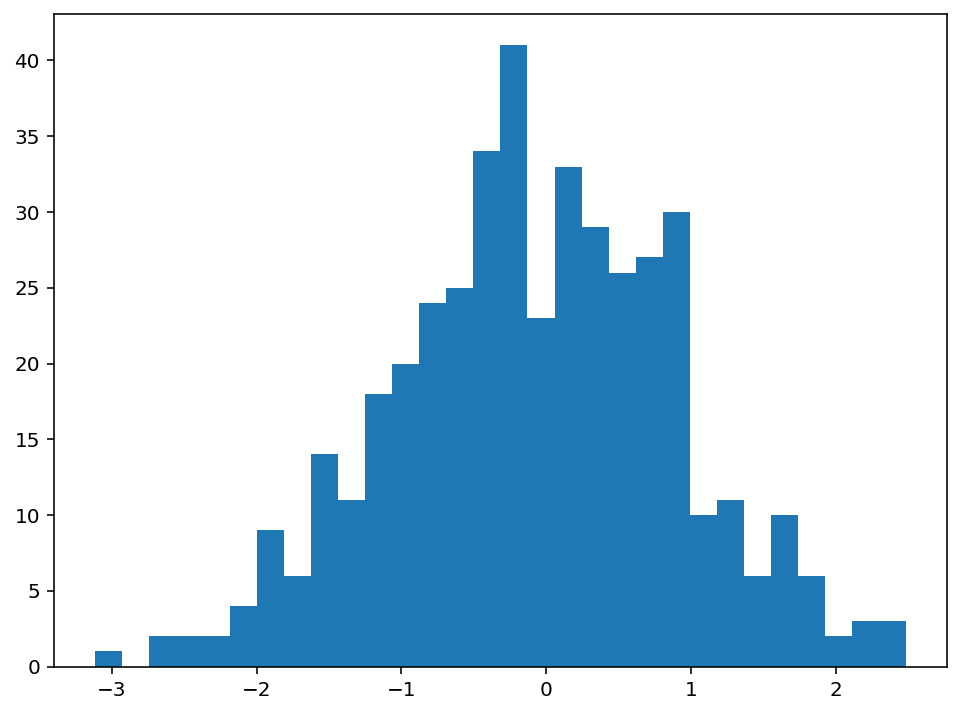

In [7]:
## 使用直方图可视化conv1.weight的分布情况
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.hist(conv1.weight.data.numpy().reshape((-1,1)),bins = 30)
plt.show()

In [8]:
## 使用指定值初始化偏置
torch.nn.init.constant(conv1.bias,val=0.1)

/Users/daitu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  


Parameter containing:
tensor([0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
        0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000],
       requires_grad=True)

####  针对一个网络的权重初始化方法

定义一个TestNet()网络类为例

In [9]:
## 建立一个测试网络
class TestNet(nn.Module):
    def __init__(self):
        super(TestNet,self).__init__()
        self.conv1 = nn.Conv2d(3,16,3)
        self.hidden = nn.Sequential(
            nn.Linear(100,100),
            nn.ReLU(),
            nn.Linear(100,50),
            nn.ReLU(),
        )
        self.cla = nn.Linear(50,10)
    ## 定义网络的向前传播路径   
    def forward(self, x):
        x = self.conv1(x)
        x = x.view(x.shape[0],-1)
        x = self.hidden(x)
        output = self.cla(x)
        return output
        
## 输出我们的网络结构
testnet = TestNet()
print(testnet)


TestNet(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (hidden): Sequential(
    (0): Linear(in_features=100, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=50, bias=True)
    (3): ReLU()
  )
  (cla): Linear(in_features=50, out_features=10, bias=True)
)


In [10]:
## 定义为网络中的没个层进行权重初始化的函数
def init_weights(m):
    ## 如果是卷积层
    if type(m) == nn.Conv2d:
        torch.nn.init.normal(m.weight,mean=0,std=0.5)
    ## 如果是全连接层
    if type(m) == nn.Linear:
        torch.nn.init.uniform(m.weight,a=-0.1,b=0.1)
        m.bias.data.fill_(0.01)
        

## 使用网络的apply方法进行权重初始化
torch.manual_seed(13)  ## 随机数初始化种子
testnet.apply(init_weights)
testnet.cla.weight.data

/Users/daitu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  """
/Users/daitu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  


tensor([[-8.1426e-02, -8.6253e-02,  7.1077e-02,  4.0488e-02,  9.2366e-02,
          7.0249e-02, -4.4473e-02, -8.0497e-02, -8.0821e-02,  1.0651e-02,
          9.6692e-02, -4.2943e-02, -3.7903e-02,  2.9388e-02,  3.5153e-02,
          8.5084e-02, -2.7165e-02, -7.8487e-02, -8.7527e-02, -2.8606e-02,
         -9.3839e-02, -9.6745e-02,  2.1198e-03,  6.5725e-02,  2.1067e-02,
         -7.8905e-02,  2.3045e-02, -3.1271e-02,  4.7324e-02,  8.4716e-02,
          1.8341e-02, -1.0031e-02,  1.9340e-02,  7.6852e-02,  4.8772e-02,
          4.6029e-03, -9.9761e-02,  4.8784e-02,  8.0059e-02,  5.3519e-02,
         -7.5982e-02, -7.4513e-02,  4.6608e-02, -6.0962e-02,  9.1081e-02,
         -5.2580e-02, -6.4547e-02,  6.4691e-02, -3.7616e-02,  6.6632e-02],
        [ 7.2539e-02,  4.4024e-02, -5.8722e-02, -4.7674e-03, -1.3742e-02,
         -2.8310e-02, -7.6522e-02,  7.3045e-02,  5.5755e-02, -3.6266e-02,
         -1.5133e-02,  7.6951e-03, -1.6839e-03,  1.8865e-02,  1.6769e-02,
         -2.1692e-02, -4.4572e-02,  8

## 3.6 Pytorch中定义网络的方式


### 数据准备

In [11]:
import torch
import torch.nn as nn
from torch.optim import SGD
import torch.utils.data as Data
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [12]:
## 读取数据
boston_X,boston_y = load_boston(return_X_y=True)
print("boston_X.shape:",boston_X.shape)

boston_X.shape: (506, 13)


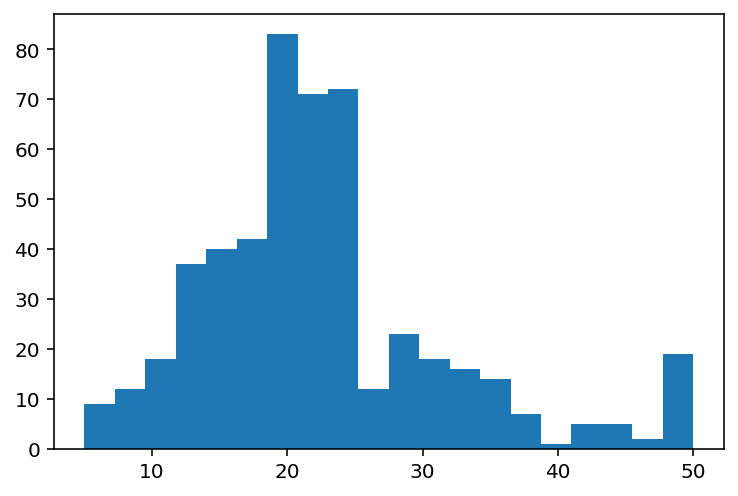

In [13]:
plt.figure()
plt.hist(boston_y,bins=20)
plt.show()

In [14]:
## 数据标准化处理
ss = StandardScaler(with_mean=True,with_std=True)
boston_Xs = ss.fit_transform(boston_X)
# boston_ys = ss.fit_transform(boston_y)
np.mean(boston_Xs,axis=0)
np.std(boston_Xs,axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [15]:
## 将数据预处理为可以使用pytorch进行批量训练的形式
## 训练集X转化为张量
train_xt = torch.from_numpy(boston_Xs.astype(np.float32))
## 训练集y转化为张量
train_yt = torch.from_numpy(boston_y.astype(np.float32))
## 将训练集转化为张量后,使用TensorDataset将X和Y整理到一起
train_data = Data.TensorDataset(train_xt,train_yt)
## 定义一个数据加载器，将训练数据集进行批量处理
train_loader = Data.DataLoader(
    dataset = train_data, ## 使用的数据集
    batch_size=128, # 批处理样本大小
    shuffle = True, # 每次迭代前打乱数据
    num_workers = 1, # 使用两个进程 
)

# ##  检查训练数据集的一个batch的样本的维度是否正确
# for step, (b_x, b_y) in enumerate(train_loader):  
#     if step > 0:
#         break
# ## 输出训练图像的尺寸和标签的尺寸，都是torch格式的数据
# print(b_x.shape)
# print(b_y.shape)

### 使用继承Module

In [24]:
## 使用继承Module的形式定义全连接神经网络
class MLPmodel(nn.Module):
    def __init__(self):
        super(MLPmodel,self).__init__()
        ## 定义第一个隐藏层
        self.hidden1 = nn.Linear(
            in_features = 13, ## 第一个隐藏层的输入，数据的特征数
            out_features = 10,## 第一个隐藏层的输出，神经元的数量
            bias=True, ## 默认会有偏置
        )
        self.active1 = nn.ReLU()
        ## 定义第一个隐藏层
        self.hidden2 = nn.Linear(10,10)
        self.active2 = nn.ReLU()
        ## 定义预测回归层
        self.regression = nn.Linear(10,1)

    ## 定义网络的向前传播路径   
    def forward(self, x):
        x = self.hidden1(x)
        x = self.active1(x)
        x = self.hidden2(x)
        x = self.active2(x)
        output = self.regression(x)
        ## 输出为output
        return output
        
## 输出我们的网络结构
mlp1 = MLPmodel()
print(mlp1)

MLPmodel(
  (hidden1): Linear(in_features=13, out_features=10, bias=True)
  (active1): ReLU()
  (hidden2): Linear(in_features=10, out_features=10, bias=True)
  (active2): ReLU()
  (regression): Linear(in_features=10, out_features=1, bias=True)
)


In [25]:
## 对回归模型mlp1进行训练并输出损失函数的变化情况
# 定义优化器和损失函数
optimizer = SGD(mlp1.parameters(),lr=0.001)  
loss_func = nn.MSELoss()  # 最小平方根误差
train_loss_all = [] ## 输出每个批次训练的损失函数
## 进行训练，并输出每次迭代的损失函数
for epoch in range(30):
    ## 对训练数据的迭代器进行迭代计算
    for step, (b_x, b_y) in enumerate(train_loader):  
        output = mlp1(b_x).flatten()      # MLP在训练batch上的输出
        train_loss = loss_func(output,b_y) # 平方根误差
        optimizer.zero_grad()           # 每个迭代步的梯度初始化为0
        train_loss.backward()           # 损失的后向传播，计算梯度
        optimizer.step()                # 使用梯度进行优化
        train_loss_all.append(train_loss.item())

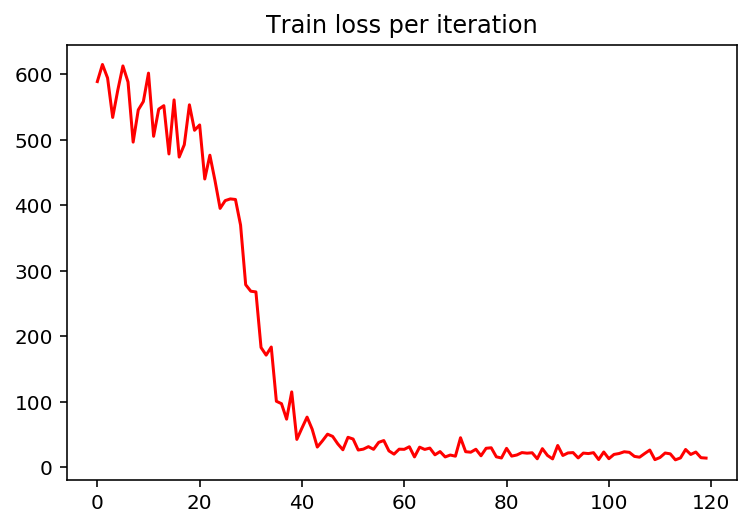

In [26]:
plt.figure()
plt.plot(train_loss_all,"r-")
plt.title("Train loss per iteration")
plt.show()

### 使用nn.Sequential

In [32]:
## 使用定义网络时使用nn.Sequential的形式
class MLPmodel2(nn.Module):
    def __init__(self):
        super(MLPmodel2,self).__init__()
        ## 定义隐藏层
        self.hidden = nn.Sequential(
            nn.Linear(13, 10),
            nn.ReLU(),
            nn.Linear(10,10),
            nn.ReLU(),
        )
        ## 预测回归层
        self.regression = nn.Linear(10,1)

    ## 定义网络的向前传播路径   
    def forward(self, x):
        x = self.hidden(x)
        output = self.regression(x)
        return output
        
## 输出我们的网络结构
mlp2 = MLPmodel2()
print(mlp2)

MLPmodel2(
  (hidden): Sequential(
    (0): Linear(in_features=13, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
  )
  (regression): Linear(in_features=10, out_features=1, bias=True)
)


In [33]:
## 对回归模型mlp2进行训练并输出损失函数的变化情况
# 定义优化器和损失函数
optimizer = SGD(mlp2.parameters(),lr=0.001)  
loss_func = nn.MSELoss()  # 最小平方根误差
train_loss_all = [] ## 输出每个批次训练的损失函数
## 进行训练，并输出每次迭代的损失函数
for epoch in range(30):
    ## 对训练数据的迭代器进行迭代计算
    for step, (b_x, b_y) in enumerate(train_loader):  
        output = mlp2(b_x).flatten()               # MLP在训练batch上的输出
        train_loss = loss_func(output,b_y) # 平方根误差
        optimizer.zero_grad()           # 每个迭代步的梯度初始化为0
        train_loss.backward()           # 损失的后向传播，计算梯度
        optimizer.step()                # 使用梯度进行优化
        train_loss_all.append(train_loss.item())

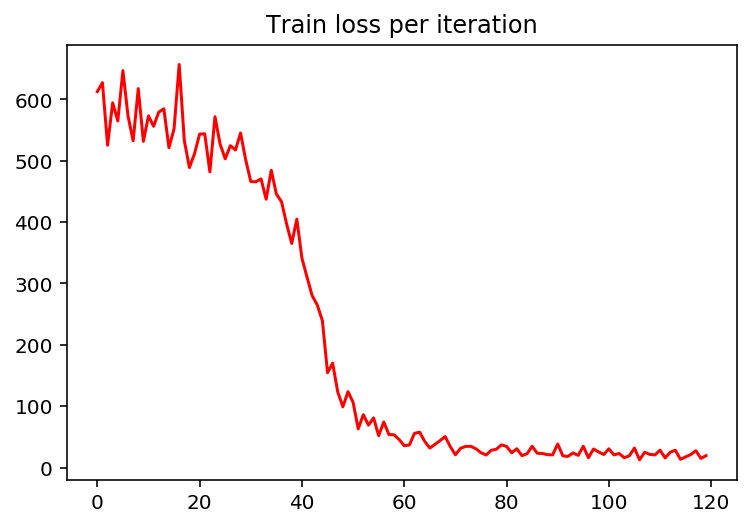

In [34]:
plt.figure()
plt.plot(train_loss_all,"r-")
plt.title("Train loss per iteration")
plt.show()

## Pytorch模型保存和加载方法

### 方法1:保存整个模型

In [39]:
## 保存整个模型
torch.save(mlp2,"data/chap3/mlp2.pkl")

/Users/daitu/anaconda3/lib/python3.6/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type MLPmodel2. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/Users/daitu/anaconda3/lib/python3.6/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Sequential. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/Users/daitu/anaconda3/lib/python3.6/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Linear. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/Users/daitu/anaconda3/lib/python3.6/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type ReLU. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". I

In [36]:
## 导入保存的模型
mlp2load = torch.load("data/chap3/mlp2.pkl")
mlp2load

MLPmodel2(
  (hidden): Sequential(
    (0): Linear(in_features=13, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
  )
  (regression): Linear(in_features=10, out_features=1, bias=True)
)

### 方法2:只保存模型的参数

In [37]:
torch.save(mlp2.state_dict(),"data/chap3/mlp2_param.pkl")

In [38]:
## 导入保存的模型的参数
mlp2param = torch.load("data/chap3/mlp2_param.pkl")
mlp2param

OrderedDict([('hidden.0.weight',
              tensor([[-0.2822,  0.1334,  0.0388,  0.1440,  0.2618,  0.4390,  0.2546, -0.2445,
                       -0.0117,  0.2910, -0.1035, -0.0712, -0.2328],
                      [-0.2626,  0.2081,  0.1885, -0.1894, -0.1423, -0.0254,  0.1633, -0.0399,
                        0.1291, -0.1579, -0.3264, -0.2108,  0.2222],
                      [-0.0472, -0.2940,  0.3935,  0.3286, -0.3327, -0.1558, -0.0870, -0.0583,
                        0.1240,  0.0577,  0.0137,  0.0661, -0.4534],
                      [-0.2986, -0.2876,  0.0924, -0.1612,  0.0596,  0.0798,  0.0854, -0.0612,
                        0.1263,  0.1125,  0.2076, -0.1917, -0.1338],
                      [-0.0387, -0.2553, -0.2541,  0.1680,  0.1431, -0.0731,  0.0550, -0.0643,
                        0.2325, -0.2246, -0.0173,  0.0460,  0.0388],
                      [ 0.0909, -0.0387,  0.2761, -0.1015, -0.1025, -0.1738,  0.2652, -0.1256,
                       -0.0439, -0.0241,  0.1340, -0